In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import colors
import numpy as np
import pandas.io.formats.format as pf
plt.style.use ('seaborn-whitegrid')

# display numbers (floats) with thousand separator
pd.options.display.float_format = '{:,.0f}'.format

# found this hack to format integers for display with thousand separator
# https://stackoverflow.com/questions/29663252/format-pandas-integers-for-display?answertab=active#tab-top
class IntArrayFormatter(pf.GenericArrayFormatter):
    def _format_strings(self):
        formatter = self.formatter or '{:,d}'.format
        fmt_values = [formatter(x) for x in self.values]
        return fmt_values
pf.IntArrayFormatter = IntArrayFormatter

In [2]:
data = {'2016':['NYC','LA','PHL','CHI'], '2017':['NYC','LA','CHI','PHL'],'2018':['PHL','LA','CHI','NYC']}
df = pd.DataFrame(data, index =[str(i) for i in range(1,5)]) 
df

,2016,2017,2018
1,NYC,NYC,PHL
2,LA,LA,LA
3,PHL,CHI,CHI
4,CHI,PHL,NYC


In [3]:
vals=np.full(df.shape,0)
vals

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [4]:
val_list=[[0 for i in range(df.shape[1])] for j in range(df.shape[0])]
val_list

[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]]

In [5]:
for i,v1 in enumerate(val_list):
    for j,v2 in enumerate(v1):
        print(i,j)

0 0
0 1
0 2
1 0
1 1
1 2
2 0
2 1
2 2
3 0
3 1
3 2


In [6]:
df.iloc[0,[0]]
        

2016    NYC
Name: 1, dtype: object

In [7]:
df.iloc[1,[2]]

2018    LA
Name: 2, dtype: object

In [8]:
for i,v1 in enumerate(val_list):
    for j,v2 in enumerate(v1):
        print (i,j)
        print (df.iloc[i,[j]])

0 0
2016    NYC
Name: 1, dtype: object
0 1
2017    NYC
Name: 1, dtype: object
0 2
2018    PHL
Name: 1, dtype: object
1 0
2016    LA
Name: 2, dtype: object
1 1
2017    LA
Name: 2, dtype: object
1 2
2018    LA
Name: 2, dtype: object
2 0
2016    PHL
Name: 3, dtype: object
2 1
2017    CHI
Name: 3, dtype: object
2 2
2018    CHI
Name: 3, dtype: object
3 0
2016    CHI
Name: 4, dtype: object
3 1
2017    PHL
Name: 4, dtype: object
3 2
2018    NYC
Name: 4, dtype: object


In [9]:
change=[[0,0,1],[0,0,0],[0,1,0],[0,-1,-1]]
change

[[0, 0, 1], [0, 0, 0], [0, 1, 0], [0, -1, -1]]

In [10]:
achange=np.array([[0,0,1],[0,0,0],[0,1,0],[0,-1,-1]])
achange

array([[ 0,  0,  1],
       [ 0,  0,  0],
       [ 0,  1,  0],
       [ 0, -1, -1]])

In [11]:
alabels=np.array([['NYC','NYC','PHL'],['LA','LA','LA'],['PHL','CHI','CHI'],['CHI','PHL','NYC']])
alabels

array([['NYC', 'NYC', 'PHL'],
       ['LA', 'LA', 'LA'],
       ['PHL', 'CHI', 'CHI'],
       ['CHI', 'PHL', 'NYC']], dtype='<U3')

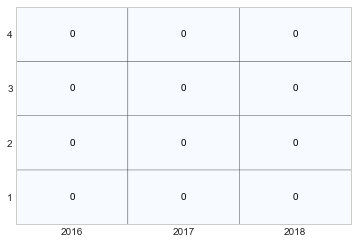

In [12]:
g=plt.pcolor(val_list, cmap='Blues', edgecolors='k')
plt.yticks(np.arange(0.5, len(df.index), 1), df.index)
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns)

def show_values(pc, fmt="%d", **kw):
    pc.update_scalarmappable()
    ax = pc.axes
    for p, color, value in zip(pc.get_paths(), pc.get_facecolors(), pc.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.all(color[:3] > 0.5):
            color = (0.0, 0.0, 0.0)
        else:
            color = (1.0, 1.0, 1.0)
        ax.text(x, y, fmt % value, ha="center", va="center", color=color, **kw)

show_values(g)
plt.show()

In [13]:
df.shape[0]

4

In [14]:
#mycolors = colors.ListedColormap(['#73a6dc','#e4e2e1','#98d669'])
mycolors = colors.ListedColormap(['lightblue','ghostwhite','palegreen'])

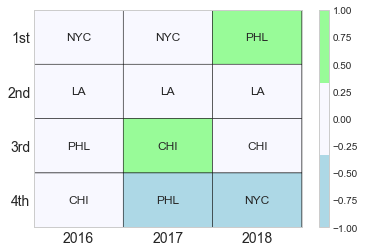

In [15]:
ylabels=['1st','2nd','3rd','4th']
xlabels=['2016','2017','2018']

ax = plt.pcolor(achange,cmap=mycolors,edgecolors='k',linewidths=0.5)

plt.yticks(np.arange(0.5, len(ylabels), 1), ylabels)
plt.xticks(np.arange(0.5, len(xlabels), 1), xlabels)

for y in range(achange.shape[0]):
    for x in range(achange.shape[1]):
        plt.text(x + 0.5, y + 0.5, '%s' % alabels[y, x],
                 horizontalalignment='center',
                 verticalalignment='center',
                 fontsize=12,
                 )
plt.colorbar()
plt.gca().invert_yaxis()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

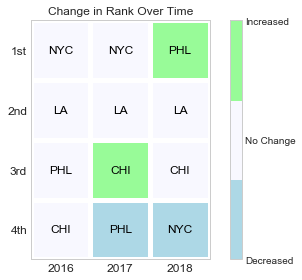

In [16]:
fig, ax = plt.subplots()
im = ax.imshow(achange, cmap=mycolors)

# We want to show all ticks...
ax.set_xticks(np.arange(len(xlabels)))
ax.set_yticks(np.arange(len(ylabels)))
# ... and label them with the respective list entries
ax.set_xticklabels(xlabels)
ax.set_yticklabels(ylabels)

# Create white grid.
ax.set_xticks(np.arange(achange.shape[1]+1)-.5, minor=True)
ax.set_yticks(np.arange(achange.shape[0]+1)-.5, minor=True)
ax.grid(which="minor", color="w", linestyle='-', linewidth=5)
ax.grid(which="major",visible=False)

cbar = ax.figure.colorbar(im, ax=ax, ticks=[1,0,-1])
cbar.ax.set_yticklabels(['Increased','No Change','Decreased'])

# Loop over data dimensions and create text annotations.
for i in range(len(ylabels)):
    for j in range(len(xlabels)):
        text = ax.text(j, i, alabels[i, j],
                       ha="center", va="center", color="k", fontsize=12)

ax.set_title("Change in Rank Over Time")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
fig.tight_layout()
plt.show()

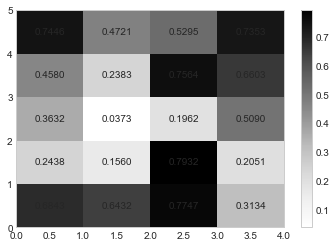

In [17]:
data = np.random.rand(5, 4)
heatmap = plt.pcolor(data)

for y in range(data.shape[0]):
    for x in range(data.shape[1]):
        plt.text(x + 0.5, y + 0.5, '%.4f' % data[y, x],
                 horizontalalignment='center',
                 verticalalignment='center',
                 )

plt.colorbar(heatmap)

plt.show()

In [ ]:
data.shape[1]

In [ ]:
fig, ax = plt.subplots()
im = ax.imshow(vals)


# ... and label them with the respective list entries
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.index)

ax.set_title("Test")
#fig.tight_layout()
plt.show()

In [ ]:
data = {'2016':[500,400,300,200], '2017':[600,300,400,200],'2018':[500,200,400,300]}
df = pd.DataFrame(data, index =['LA','NYC','PHL','CHI']) 
df  

In [ ]:
fig, ax = plt.subplots()
im = ax.imshow(df)

# We want to show all ticks...
ax.set_xticks(df.columns)
ax.set_yticks(df.index)
# ... and label them with the respective list entries
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.index)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

ax.set_title("Test")
fig.tight_layout()
plt.show()

